In [32]:
import pandas as pd
import matplotlib.pyplot as plt

## Teenagers and young adults of age 17-21 sentenced with decree absolute in Poland during 2010-2018

Source: https://stat.gov.pl/obszary-tematyczne/wymiar-sprawiedliwosci/wymiar-sprawiedliwosci/przestepstwa-przeciwko-zyciu-i-zdrowiu,3,1.html

### Overview and basic statistics

In [2]:
#data overview
df = pd.read_csv('wyroki.csv')
df

,wiek,płeć,rok,skazanych
0,17,Kobiety,2010,741
1,18,Kobiety,2010,1018
2,19,Kobiety,2010,1126
3,20,Kobiety,2010,1188
4,21,Kobiety,2010,1205
...,...,...,...,...
85,17,Mężczyźni,2018,3248
86,18,Mężczyźni,2018,5490
87,19,Mężczyźni,2018,6466
88,20,Mężczyźni,2018,6857


Records are numbers of sentenced people grouped by age and gender.

In [3]:
#basic statistics
df.describe()

,wiek,rok,skazanych
count,90.000000,90.000000,90.000000
mean,19.000000,2014.000000,5375.355556
std,1.422136,2.596454,5233.707765
min,17.000000,2010.000000,324.000000
25%,18.000000,2012.000000,832.250000
50%,19.000000,2014.000000,2226.500000
75%,20.000000,2016.000000,9021.000000
max,21.000000,2018.000000,15946.000000


Since there isn't much data here, the only variable worth computing is the number of sentenced.

The smallest group has only a little over 300 sentenced - not many compared to the biggest one with over 15k.
On average, a group of certain age and gender consists of 5k people.

Let's see how many people were sentenced gender-wise.

In [4]:
#people sentenced in total
df['skazanych'].sum()

483782

In [5]:
#of which women
data = df[df["płeć"]=='Kobiety']
data['skazanych'].sum()

37192

In [6]:
#and men
data = df[df["płeć"]=='Mężczyźni']
data['skazanych'].sum()

446590

### People sentenced in particular years considering gender

I split the sample into two dataframes, df_women and df_men, grouping by gender.

In [7]:
df_women = df[df["płeć"]=='Kobiety']
df_men = df[df["płeć"]=='Mężczyźni']

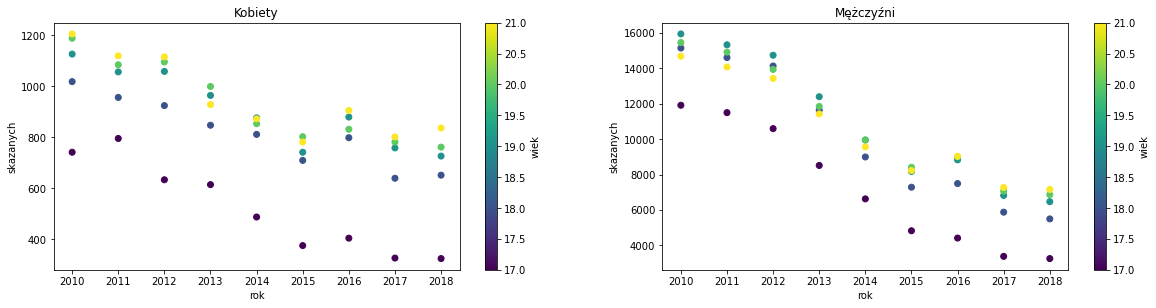

In [8]:
#scatterplots
plt.figure(figsize=(20,10))

#statistics for women
plt.subplot(221)
plt.title('Kobiety')

plt.scatter(x=df_women['rok'], y=df_women['skazanych'], c=df_women['wiek'])
plt.xlabel('rok')
plt.ylabel('skazanych')
#plt.ylim((0, 16000))   #set the yscale to the same as men's

clb=plt.colorbar()
clb.set_label('wiek')


#statistics for men
plt.subplot(222)
plt.title("Mężczyźni")

plt.scatter(x=df_men['rok'], y=df_men['skazanych'], c=df_men['wiek'])
plt.xlabel('rok')
plt.ylabel('skazanych')

clb=plt.colorbar()
clb.set_label('wiek')


plt.show()

In general we can see a consistent drop in number of sentenced throughout the years for both genders. However, if we set the range of Y axis scale for women to be the same as men's the difference in numbers in each year is very evident. 

For example, let's compare the smallest groups for each gender - female one consists of less than 400 sentenced while male group has about 4 000 - that's ten times more! If we go further and look at the biggest groups, female one consists of about 1 200 sentenced and male one of 16 000 - that's about 13 times more!

For both genders each year 17-year-olds had been the smallest group with significant gap between them and the rest. The largest female groups were almost always 21-year-olds and for males it was either men of age 19 or 21.

Let's see this data on a boxplot - a better visualisation if we want to see the distribution in each group.

Kobiety:


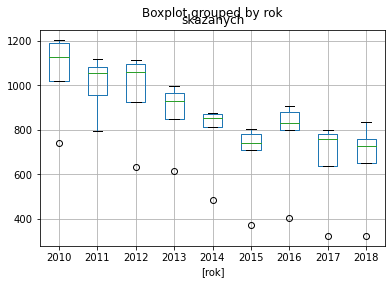

In [9]:
print('Kobiety:')
df_women = df_women[df_women['wiek']<22]
df_women[['rok', 'skazanych']].boxplot(by="rok")

Almost in each year the median is in the upper part of the box, meaning that data is skewed.

Mężczyźni:


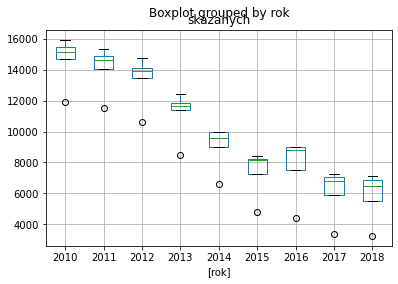

In [10]:
print('Mężczyźni:')
df_men = df_men[df_men['wiek']<22]
df_men[['rok', 'skazanych']].boxplot(by="rok")

#### Sum of sentenced in each year

In [11]:
#adding up all groups aged 17-21 in certain year
#to do that we need to create a new row of data for each year
#age=1000 indicates it's a sum of all sentenced in that year 

#women:

if(df_women.size<216): #this makes sure we don't run this cell more times than necessary - will append more rows with each iteration
    for i in range(9):
        dfw = df_women[df_women["rok"]==(2010+i)]  #choosing certain year
        sum = dfw['skazanych'].sum() #adding up all sentenced in this year
        df_sum = {'wiek': 1000, 'płeć': 'Kobiety', 'rok': (2010+i), 'skazanych': sum} #creating new record
        df_women = df_women.append(df_sum, ignore_index = True) #adding new record to df with women's data

        
#doing the same for data frame with men's data

if(df_men.size<216):     
    for i in range(9):
        dfm = df_men[df_men["rok"]==(2010+i)]  
        sum = dfm['skazanych'].sum() 
        df_sum = {'wiek': 1000, 'płeć': 'Mężczyźni', 'rok': (2010+i), 'skazanych': sum} 
        df_men = df_men.append(df_sum, ignore_index = True) 

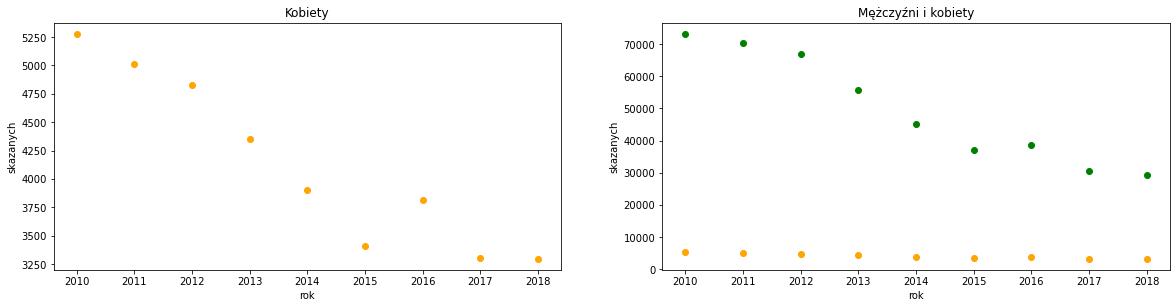

In [12]:
#more scatterplots - let's see total numbers for each gender and year

plt.figure(figsize=(20,10))


#statistics for women
plt.subplot(221)
plt.title('Kobiety')

df_women_tot = df_women[df_women["wiek"]==1000] #choosing only added up data
plt.scatter(x=df_women_tot['rok'], y=df_women_tot['skazanych'], c='orange')
plt.xlabel('rok')
plt.ylabel('skazanych')
#plt.ylim((0, 16000))   #set the yscale to the same as men's


#statistics for men
plt.subplot(222)
plt.title('Mężczyźni i kobiety')

df_men_tot = df_men[df_men["wiek"]==1000] 
plt.scatter(x=df_men_tot['rok'], y=df_men_tot['skazanych'], c='green')
plt.scatter(x=df_women_tot['rok'], y=df_women_tot['skazanych'], c='orange') #let's put women on the plot for reference
plt.xlabel('rok')
plt.ylabel('skazanych')

plt.show()

Same as before - there's a drop throughout the years, tendency is similar for both genders. If we put statistics for both genders on one plot, female groups look very small in comparison to male ones and seem almost like a constant.

2017 was the year when number of sentenced was the lowest while 2010 had the highest number, regardless the gender.

Now, let's see them all together.

In [25]:
#adding up all sentenced in each year

if(df.size<396): #this makes sure we don't run this cell more times than necessary - will append more rows with each iteration
    for i in range(9):
        women = df_women[(df_women["rok"]==(2010+i))&(df_women["wiek"]==1000)]
        men = df_men[(df_men["rok"]==(2010+i))&(df_men["wiek"]==1000)]
        sum = women['skazanych'].sum()+men['skazanych'].sum() #adding up all sentenced men&women in this year
        df_sum = {'wiek': 1000, 'płeć': 'Razem', 'rok': (2010+i), 'skazanych': sum} #creating new record
        df = df.append(df_sum, ignore_index = True) #adding new record to df
       

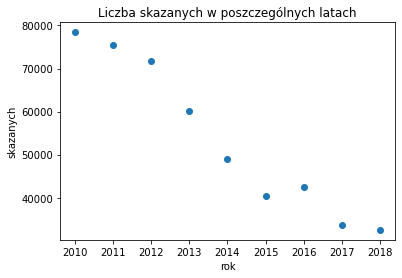

In [26]:
#creating scatterplot

df_sum = df[(df["wiek"]==1000)&(df["płeć"]=='Razem')]
plt.scatter(x=df_sum['rok'], y=df_sum['skazanych'])
plt.xlabel('rok')
plt.ylabel('skazanych')
plt.title('Liczba skazanych w poszczególnych latach')
plt.show()

Tendency is same as before, this is just to show the scale of all people sentenced.

### Sentenced divided into groups of age

Now, let's set gender aside and look at years of age.

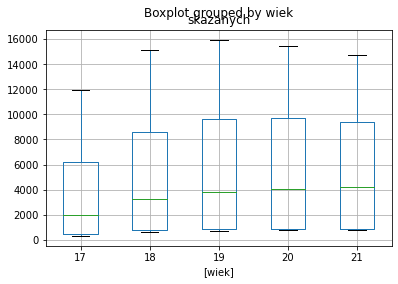

In [13]:
data = df[['wiek', 'skazanych']]
data.boxplot(by="wiek")

The biggest range in size of groups is for people of 19 years of age.

Now, let's group sentenced age-wise.

In [30]:
#adding up depending of year of age

if(df.size<416): 
    for i in range(5):
        women = df_women[df_women["wiek"]==17+i]
        men = df_men[df_men["wiek"]==17+i]
        sum = women['skazanych'].sum()+men['skazanych'].sum() #adding up all sentenced men&women in this year
        df_sum = {'wiek': 17+i, 'płeć': 'Razem', 'rok': 1000, 'skazanych': sum} #creating new record
        df = df.append(df_sum, ignore_index = True) #adding new record to df

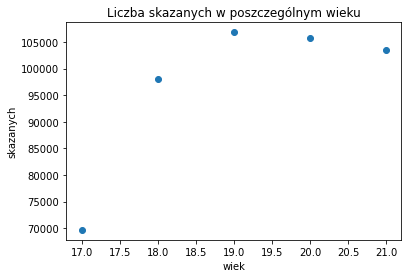

In [31]:
#creating scatterplot

df_sum = df[(df["rok"]==1000)&(df["płeć"]=='Razem')]
plt.scatter(x=df_sum['wiek'], y=df_sum['skazanych'])
plt.xlabel('wiek')
plt.ylabel('skazanych')
plt.title('Liczba skazanych w poszczególnym wieku')
plt.show()

A confirmation of what we saw before - 19 year olds received a decree absolute most often.